In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

random_seed = np.random.RandomState(25)

In [2]:
X_train = 0.5 * random_seed.randn(500, 2)
X_train = np.r_[X_train + 4, X_train]
X_train = pd.DataFrame(X_train, columns=["x", "y"])

In [3]:
X_test = 0.5 * random_seed.randn(500, 2)
X_test = np.r_[X_test + 4, X_test]
X_test = pd.DataFrame(X_test, columns=["x", "y"])

In [4]:
X_outliers = random_seed.uniform(low=-5, high=8, size=(50, 2))
X_outliers = pd.DataFrame(X_outliers, columns=["x", "y"])

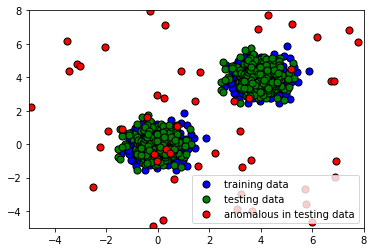

In [5]:
p1 = plt.scatter(X_train.x, X_train.y, c="blue", s=50, edgecolor="black")
p2 = plt.scatter(X_test.x, X_test.y, c="green", s=50, edgecolor="black")
p3 = plt.scatter(X_outliers.x, X_outliers.y, c="red", s=50, edgecolor="black")
plt.xlim((-5, 8))
plt.ylim((-5, 8))
plt.legend(
    [p1, p2, p3],
    ["training data", "testing data", "anomalous in testing data"],
    loc="lower right",
)

plt.show()

In [6]:
clf = IsolationForest(n_estimators=10,
                          max_features=1.0,
                          max_samples='auto',
                          contamination='auto',
                          bootstrap=False,
                          n_jobs=1,
                          random_state=1)
clf.fit(X_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
y_pred_outliers = clf.predict(X_outliers)

In [7]:
X_outliers = X_outliers.assign(anomaly=y_pred_outliers)
X_outliers.head(10)

,x,y,anomaly
0,5.221958,7.195575,-1
1,-3.504092,6.182738,-1
2,2.234658,-0.514025,-1
3,-2.239798,-0.192622,-1
4,-3.152075,4.768292,-1
5,-3.444839,4.370750,-1
6,0.318847,-0.295628,1
7,5.190676,4.474284,-1
8,6.191785,6.404655,-1
9,3.238746,-2.994312,-1


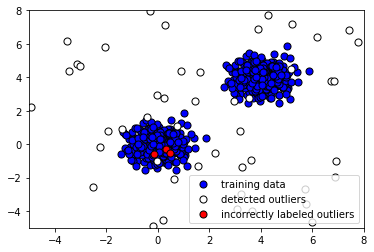

In [8]:
p1 = plt.scatter(X_train.x, X_train.y, c="blue", s=50, edgecolor="black")
p2 = plt.scatter(
    X_outliers.loc[X_outliers.anomaly == -1, ["x"]],
    X_outliers.loc[X_outliers.anomaly == -1, ["y"]],
    c="white",
    s=50,
    edgecolor="black",
)
p3 = plt.scatter(
    X_outliers.loc[X_outliers.anomaly == 1, ["x"]],
    X_outliers.loc[X_outliers.anomaly == 1, ["y"]],
    c="red",
    s=50,
    edgecolor="black",
)

plt.xlim((-5, 8))
plt.ylim((-5, 8))
plt.legend(
    [p1, p2, p3],
    ["training data", "detected outliers", "incorrectly labeled outliers"],
    loc="lower right",
)

plt.show()

In [9]:
scores_test = clf.score_samples(X_test)

In [10]:
X_test = X_test.assign(anomaly=y_pred_test)
X_test = X_test.assign(score=scores_test)
X_test.sample(10)

,x,y,anomaly,score
727,-0.420929,-0.928272,-1,-0.538822
634,0.018826,1.077711,-1,-0.519363
514,-0.064769,-0.039358,1,-0.423386
339,4.714799,3.941993,1,-0.475549
651,0.304686,0.271191,1,-0.425034
899,-0.117089,0.370762,1,-0.452881
261,3.963752,3.881204,1,-0.441061
135,3.781206,4.348202,1,-0.442009
375,4.200637,5.070762,-1,-0.585295
723,0.650615,0.150602,1,-0.455611


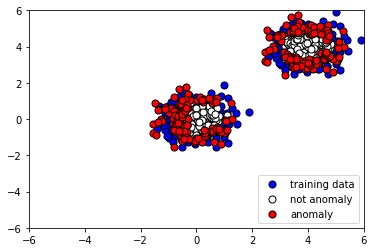

In [11]:
p1 = plt.scatter(X_train.x, X_train.y, c="blue", s=50, edgecolor="black")
p2 = plt.scatter(
    X_test.loc[X_test.anomaly == 1, ["x"]],
    X_test.loc[X_test.anomaly == 1, ["y"]],
    c="white",
    s=50,
    edgecolor="black",
)
p3 = plt.scatter(
    X_test.loc[X_test.anomaly == -1, ["x"]],
    X_test.loc[X_test.anomaly == -1, ["y"]],
    c="red",
    s=50,
    edgecolor="black",
)

plt.xlim((-6, 6))
plt.ylim((-6, 6))
plt.legend(
    [p1, p2, p3],
    [
        "training data",
        "not anomaly",
        "anomaly",
    ],
    loc="lower right",
)

plt.show()

In [12]:
X_test[X_test['anomaly'] == -1].sort_values(by=['score']).reset_index(drop=True)

,x,y,anomaly,score
0,-0.433277,-1.120424,-1,-0.675420
1,-0.811485,-1.565637,-1,-0.670866
2,5.256989,4.879035,-1,-0.665408
3,0.895626,-1.387424,-1,-0.665008
4,-0.513018,-1.189215,-1,-0.661849
...,...,...,...,...
283,3.500464,3.316391,-1,-0.500384
284,3.560448,3.336826,-1,-0.500384
285,3.581004,3.434534,-1,-0.500347
286,-0.516675,-0.594148,-1,-0.500229
